In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

### A/A-тест, который сходится

100%|██████████| 1000/1000 [00:09<00:00, 104.27it/s]


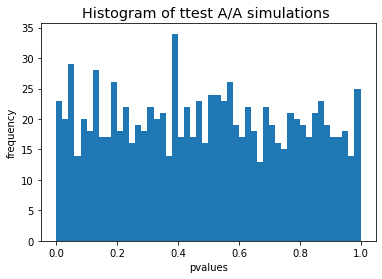

0.062

In [2]:
n = 100000
simulations = 1000
n_s = 1000
res = []

df = pd.DataFrame({
    "s1": np.random.exponential(scale=1/0.001, size=n),
    "s2": np.random.exponential(scale=1/0.001, size=n)
})

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df['s1'].sample(n_s, replace = False).values
    s2 = df['s2'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [4]:
alphas = { 0.05:0, 0.04:0, 0.03:0, 0.02:0, 0.01:0}

for a in alphas:
    alphas[a] = sum(np.array(res) < a) / simulations
    if a < alphas[a]:
        print(f'количество ложноположительных случаев превышает альфа {a} < {alphas[a]}')

# Проверяем, что количество ложноположительных случаев не превышает альфа
print(alphas)

количество ложноположительных случаев превышает альфа 0.05 < 0.062
количество ложноположительных случаев превышает альфа 0.04 < 0.042
количество ложноположительных случаев превышает альфа 0.03 < 0.033
количество ложноположительных случаев превышает альфа 0.02 < 0.022
количество ложноположительных случаев превышает альфа 0.01 < 0.013
{0.05: 0.062, 0.04: 0.042, 0.03: 0.033, 0.02: 0.022, 0.01: 0.013}


### Второй случай, когда A/A-тест не сходится

100%|██████████| 1000/1000 [00:09<00:00, 105.34it/s]


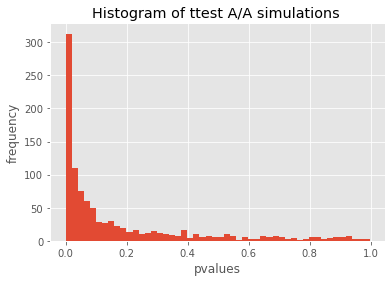

0.472

In [5]:
n = 100000
simulations = 1000
n_s = 1000
res = []

df = pd.DataFrame({
    "s1": np.random.exponential(scale=1/0.001, size=n),
    "s2": np.random.exponential(scale=1/0.001, size=n) * 1.1 # добавляем эффект 10%
})

for i in tqdm(range(simulations)):
    s1 = df['s1'].sample(n_s, replace = False).values
    s2 = df['s2'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# FPR не сойдется
sum(np.array(res) <0.05) / simulations

In [6]:
alphas = { 0.05:0, 0.04:0, 0.03:0, 0.02:0, 0.01:0}

for a in alphas:
    alphas[a] = sum(np.array(res) < a) / simulations
    if a < alphas[a]:
        print(f'количество ложноположительных случаев превышает альфа {a} < {alphas[a]}')

# Проверяем, что количество ложноположительных случаев не превышает альфа
print(alphas)

количество ложноположительных случаев превышает альфа 0.05 < 0.472
количество ложноположительных случаев превышает альфа 0.04 < 0.423
количество ложноположительных случаев превышает альфа 0.03 < 0.368
количество ложноположительных случаев превышает альфа 0.02 < 0.315
количество ложноположительных случаев превышает альфа 0.01 < 0.213
{0.05: 0.472, 0.04: 0.423, 0.03: 0.368, 0.02: 0.315, 0.01: 0.213}
